In [1]:
import torch
from fastai.vision.all import *
import re

In [2]:
import os,sys,inspect
sys.path.insert(0, '..') 

In [3]:
from lib.modules.matcher import HungarianMatcher
from lib.modules.parallel import *
from lib.modules.sequential import *
from lib.modules.single_classifier import SingleClassifier
from lib.modules.matcher import HungarianMatcher
from lib.modules.parallel import *
from lib.modules.sequential import *
from lib.modules.single_classifier import SingleClassifier
from lib.label import *
from lib.label import *
from lib.metric import *
from lib.data import *
from lib.loss import *
from lib.loader import *

In [4]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=10.0, path='../data')

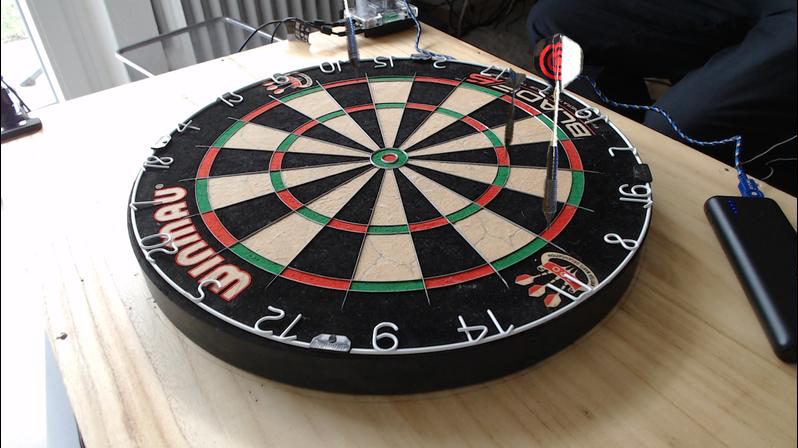

In [5]:
data.train_ds[100351][0][0]

In [6]:
data = load_data(148, (112, 199), 'train', 'valid', max_rotate=10.0, path='../data')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()

In [ ]:
 learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time


In [4]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=180.0)
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(1)

1078 54


epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.304509,0.484511,0.934132,0.896694,54:50


In [ ]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=5.0)
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(1)

1078 54


epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time


In [2]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=0.0)
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(1)

1078 54


epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.129192,0.288774,0.951263,0.922865,54:28


In [4]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=10.0, exclude=['generated6'])
len(data.train_ds)

1927

In [6]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=180.0, exclude=['generated6'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(1)

1078 54


epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,5.308149,4.913019,0.409835,0.067493,00:35


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,4.976613,4.646022,0.370146,0.086777,00:32
1,4.781619,5.660830,0.395465,0.070248,00:31
2,4.464856,4.113081,0.488597,0.304408,00:31
3,4.182221,4.108530,0.492701,0.307163,00:31
4,3.918194,4.761764,0.433316,0.110193,00:32
5,3.682556,3.259705,0.511134,0.365014,00:32


In [2]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=180.0, exclude=['smartphone'])
model = MultiDartPlusParallel2(resnet18, matcher=HungarianMatcher())
learn = Learner(data, model, metrics=[double_acc, single_acc, total_acc], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,double_acc,single_acc,total_acc,time
0,0.559248,0.684390,0.877411,0.840220,0.852617,58:16


In [3]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=180.0)
model = MultiDartPlusParallel2(resnet18, matcher=HungarianMatcher())
learn = Learner(data, model, metrics=[double_acc, single_acc, total_acc], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,double_acc,single_acc,total_acc,time
0,0.559552,0.807730,0.837466,0.796832,0.810377,1:00:10


In [2]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=10.0, exclude=['smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(1)

1078 54


epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.135276,0.298856,0.954488,0.926997,56:17


In [3]:
learn.save('448-sequential-1')

Path('models/448-sequential-1.pth')

In [2]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=10.0, exclude=['smartphone', 'generated6'])

In [3]:
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('448-sequential-1')

In [8]:
print(len(data.train_ds))
start = time.time()
learn.get_preds(ds_idx=0)
end = time.time()
print(end - start)

233991


1258.0796315670013


In [9]:
data = load_data(128, (448, 796), 'train', 'valid', max_rotate=10.0, exclude=['smartphone', 'generated6'])

In [10]:
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('448-sequential-1')

In [11]:
print(len(data.train_ds))
start = time.time()
learn.get_preds(ds_idx=0)
end = time.time()
print(end - start)

233991


KeyboardInterrupt: 

SuggestedLRs(lr_min=0.0003019951749593019, lr_steep=0.00015848931798245758)

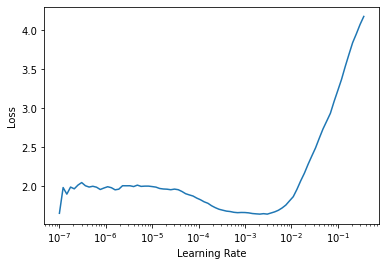

In [4]:
learn.lr_find()

In [5]:
len(data.train_ds)

2672

In [6]:
learn.fit_one_cycle(5, 10e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.081219,3.055753,0.580512,0.341598,00:43
1,0.848968,0.740837,0.890695,0.838843,00:41
2,0.660978,0.166616,0.982350,0.972452,00:41
3,0.471394,0.189602,0.979014,0.966942,00:41
4,0.346288,0.156728,0.982330,0.972452,00:41


In [10]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.245252,0.126669,0.988239,0.982094,00:41
1,0.226710,0.096295,0.992470,0.988981,00:42
2,0.208490,0.107661,0.989062,0.983471,00:41
3,0.199807,0.111461,0.989087,0.983471,00:41
4,0.186100,0.107318,0.989951,0.984848,00:41


In [11]:
learn.load('448-sequential-1')
learn.fit_one_cycle(10, 1e-6)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.595028,0.702065,0.890341,0.823691,00:42
1,1.054480,0.523205,0.913966,0.860882,00:41
2,0.781197,0.313379,0.937541,0.899449,00:41
3,0.581065,0.238149,0.961256,0.938017,00:41
4,0.459274,0.161964,0.978155,0.965565,00:41
5,0.368270,0.133722,0.979788,0.968320,00:41
6,0.307421,0.110360,0.988219,0.982094,00:42
7,0.273063,0.107270,0.988219,0.982094,00:41
8,0.249847,0.110329,0.986523,0.979339,00:43
9,0.237022,0.102576,0.987352,0.980716,00:41


SuggestedLRs(lr_min=2.691534772836235e-10, lr_steep=1.5848931056439142e-08)

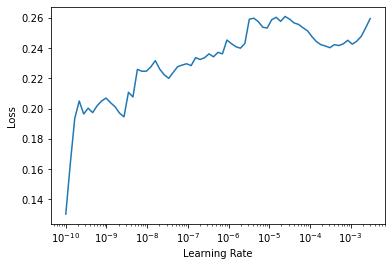

In [13]:
learn.lr_find(start_lr=1e-10)

In [14]:
learn.fit_one_cycle(10, 1e-6)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.227750,0.103478,0.988200,0.982094,00:41
1,0.229461,0.108841,0.986523,0.979339,00:41
2,0.235324,0.115512,0.983981,0.975207,00:41
3,0.232312,0.103514,0.989895,0.984848,00:42
4,0.230651,0.104801,0.989066,0.983471,00:41
5,0.232864,0.098065,0.989029,0.983471,00:41
6,0.227812,0.100036,0.989895,0.984848,00:41
7,0.220763,0.098896,0.989895,0.984848,00:42
8,0.219106,0.102589,0.987371,0.980716,00:41
9,0.223096,0.106941,0.987371,0.980716,00:41


In [15]:
learn.load('448-sequential-1')
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.155197,0.749599,0.909746,0.858127,00:43
1,0.730804,0.224636,0.961144,0.938017,00:43
2,0.621825,0.702434,0.888802,0.834711,00:43
3,0.596441,0.356871,0.937662,0.899449,00:42
4,0.593847,0.698281,0.897222,0.834711,00:43
5,0.558102,0.317429,0.955388,0.932507,00:42
6,0.466967,0.144664,0.982215,0.972452,00:42
7,0.411141,0.291811,0.958508,0.935262,00:42
8,0.359960,0.161638,0.977237,0.964187,00:43
9,0.304791,0.127064,0.983912,0.975207,00:42


In [16]:
learn.save('448-sequential-2')

Path('models/448-sequential-2.pth')

SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=2.75422871709452e-06)

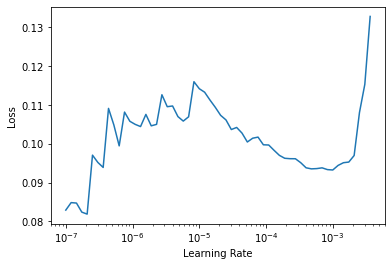

In [17]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.097692,0.069811,0.994099,0.991736,00:42
1,0.098640,0.061426,0.994099,0.991736,00:42
2,0.097407,0.074906,0.992372,0.988981,00:42
3,0.094833,0.063866,0.994057,0.991736,00:41
4,0.093102,0.054024,0.995786,0.994490,00:42
5,0.082575,0.065158,0.994082,0.991736,00:41
6,0.079913,0.065325,0.993259,0.990358,00:41
7,0.076922,0.055782,0.994938,0.993113,00:41
8,0.074080,0.059206,0.994099,0.991736,00:41
9,0.072705,0.058584,0.994099,0.991736,00:41


In [19]:
learn.load('448-sequential-1')
learn.fit_one_cycle(25)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.187819,0.796901,0.896298,0.831956,00:41
1,0.798092,0.222215,0.970484,0.954545,00:41
2,0.551475,0.261111,0.956191,0.929752,00:41
3,0.495276,0.403186,0.939158,0.903581,00:41
4,0.521568,0.300089,0.951957,0.924242,00:41
5,0.537737,1.274893,0.736940,0.589532,00:41
6,0.534536,0.443689,0.948611,0.920110,00:40
7,0.502420,0.661102,0.943639,0.914601,00:41
8,0.473738,0.373803,0.941839,0.910468,00:42
9,0.449486,0.353801,0.946144,0.913223,00:41


SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=7.585775847473997e-07)

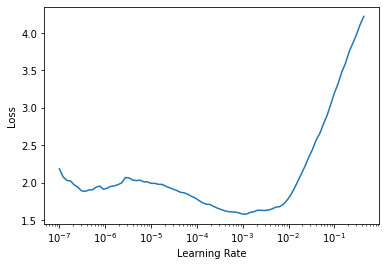

In [20]:
learn.load('448-sequential-1')
learn.lr_find()

In [21]:
learn.fit_one_cycle(20, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.779757,0.965014,0.857440,0.769973,00:41
1,1.309589,0.723123,0.878472,0.804408,00:41
2,0.988064,0.591709,0.904676,0.845730,00:42
3,0.766217,0.398441,0.917349,0.866391,00:43
4,0.606083,0.202777,0.971365,0.954545,00:42
5,0.485794,0.170417,0.976484,0.962810,00:41
6,0.391741,0.121552,0.988237,0.982094,00:41
7,0.323744,0.119007,0.985681,0.977961,00:41
8,0.276755,0.105923,0.985639,0.977961,00:41
9,0.245262,0.119824,0.989922,0.984848,00:41


In [22]:
learn.save('448-sequential-3')

Path('models/448-sequential-3.pth')

In [23]:
preds = learn.get_preds()

In [24]:
my_accuracy3(*preds)

TensorMultiCategory(0.9945)

In [2]:
def diff(y_pred, y_true, thresh: float = 0.5, sigmoid: bool = True):
    n, c = y_true.shape
    DARTS = y_pred.shape[1] // 27
    #y_true = y_true.repeat(1, 2)
    y_true_slice = y_true.view(n * DARTS, -1)[:, :20].argmax(dim=-1)
    y_true_ring = y_true.view(n * DARTS, -1)[:, 20:].argmax(dim=-1)
    y_pred_slice = y_pred.view(n * DARTS, -1)[:, :20].argmax(dim=-1)
    y_pred_ring = y_pred.view(n * DARTS, -1)[:, 20:].argmax(dim=-1)
    mask = y_true_ring < 3
    #y_true_slice = y_true_slice[mask]
    #y_pred_slice = y_pred_slice[mask]
    #y_true_ring_1 = y_true_ring[~mask]
    #y_pred_ring_1 = y_pred_ring[~mask]
    #y_true_ring_2 = y_true_ring[mask]
    #y_pred_ring_2 = y_pred_ring[mask]
    mask = (((y_pred_slice == y_true_slice) & (y_pred_ring == y_true_ring)) & (y_true_ring < 3)) | (((y_pred_ring == y_true_ring) & (y_true_ring >= 3)))
    print(y_true_slice[507:510], y_true_ring[507:510])
    print(y_pred_slice[507:510], y_pred_ring[507:510])
    print([i for i, v in enumerate(mask) if not v])
    

In [3]:
diff(*preds)

NameError: name 'preds' is not defined

In [97]:
510 / 3

170.0

In [103]:
vocab[3]

'0-12'

In [105]:
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('448-sequential-3')
preds = learn.get_preds()
my_accuracy3(*preds)

1078 54


TensorMultiCategory(0.9972)

In [2]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=180.0)
model = MultiDartPlusParallel2(resnet18, matcher=HungarianMatcher())
learn = Learner(data, model, metrics=[double_acc, single_acc, total_acc], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,double_acc,single_acc,total_acc,time
0,0.572498,0.744615,0.858127,0.815427,0.829660,59:38


In [3]:
learn.save('448-parallel-1')

Path('models/448-parallel-1.pth')

In [4]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=180.0, exclude=['generated6'])
model = MultiDartPlusParallel2(resnet18, matcher=HungarianMatcher())
learn = Learner(data, model, metrics=[double_acc, single_acc, total_acc], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('448-parallel-1')
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,double_acc,single_acc,total_acc,time
0,1.535337,0.718805,0.863636,0.853994,0.857208,02:12
1,1.105838,0.719454,0.885675,0.829890,0.848485,02:11
2,1.110218,1.075187,0.772727,0.737603,0.749311,02:10
3,1.122700,0.780689,0.874656,0.825069,0.841598,02:11
4,1.043510,0.849307,0.855372,0.813361,0.827365,02:13
5,0.975985,1.172114,0.750689,0.720386,0.730487,02:12
6,0.873249,0.825893,0.830579,0.814738,0.820018,02:12
7,0.763940,0.700375,0.882920,0.861570,0.868687,02:10
8,0.667046,0.606566,0.885675,0.853994,0.864555,02:08
9,0.567516,0.524617,0.900827,0.880165,0.887052,02:09


In [5]:
learn.save('448-parallel-2')

Path('models/448-parallel-2.pth')

In [2]:
data = load_data(64, (448, 796), 'train', 'valid', max_rotate=180.0, exclude=['generated6'])
model = MultiDartPlusParallel2(resnet18, matcher=HungarianMatcher())
learn = Learner(data, model, metrics=[double_acc, single_acc, total_acc], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('448-parallel-2')

In [3]:
classifier = SingleClassifier(learn.model.encoder, learn.model.head)

In [ ]:
save_pt(classifier, '/media/kevin/Daten/Projekte/Dart/models/parallel-1.pt')

In [6]:
torch.save(classifier.state_dict(), '/media/kevin/Daten/Projekte/Dart/models/parallel-1.pkl')

OSError: [Errno 30] Read-only file system: '/media/kevin/Daten/Projekte/Dart/models/parallel-1.pkl'

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=180.0, exclude=['generated6'])
model = MultiDartPlusParallel2(resnet18, matcher=HungarianMatcher())
learn = Learner(data, model, metrics=[double_acc, single_acc, total_acc], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('448-parallel-2')

In [4]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,double_acc,single_acc,total_acc,time
0,0.919652,0.766019,0.840220,0.797521,0.811754,44:17


In [5]:
learn.save('480-parallel-1')

Path('models/480-parallel-1.pth')

In [6]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,double_acc,single_acc,total_acc,time
0,1.549563,1.458341,0.717631,0.650138,0.672635,46:02
1,1.093802,0.836051,0.845730,0.790634,0.808999,46:07
2,0.714326,0.717083,0.858127,0.803030,0.821396,46:12


In [7]:
learn.save('480-parallel-2')

Path('models/480-parallel-2.pth')

In [4]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=180.0, exclude=['generated6'])
model = MultiDartPlusParallel2(resnet18, matcher=HungarianMatcher())
learn = Learner(data, model, metrics=[double_acc, single_acc, total_acc], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-parallel-2')

In [5]:
classifier = SingleClassifier(learn.model.encoder, learn.model.head)
save_pt(classifier, '/media/kevin/SAMSUNGBOOT/parallel-480-2.pt', (480, 640))

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated7', 'smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()

1078 54


In [3]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.121067,0.257076,0.960354,0.935262,47:41


In [4]:
learn.save('480-sequential-1')

Path('models/480-sequential-1.pth')

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated6','generated7', 'smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-1')

1078 54


In [3]:
torch.save(learn.model.state_dict(), '/media/kevin/SAMSUNGBOOT/480-sequential-1.pkl')

In [4]:
len(data.train_ds)

2709

In [5]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.351776,0.899345,0.893646,0.829201,00:43
1,0.822144,0.326585,0.965242,0.943526,00:37
2,0.790942,1.101349,0.860830,0.789256,00:37
3,0.655473,0.244359,0.953426,0.924242,00:37
4,0.531245,0.234830,0.963729,0.943526,00:37
5,0.429714,0.121570,0.983881,0.975207,00:37
6,0.333918,0.118978,0.984012,0.973829,00:38
7,0.257821,0.041156,0.995774,0.993113,00:37
8,0.207164,0.043175,0.994126,0.990358,00:37
9,0.165503,0.046464,0.993262,0.988981,00:37


In [6]:
learn.save('480-sequential-2')
torch.save(learn.model.state_dict(), '/media/kevin/SAMSUNGBOOT/480-sequential-2.pkl')

In [8]:
learn.fit_one_cycle(5, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.390868,0.147225,0.976243,0.961433,00:37
1,0.397328,0.133547,0.986459,0.977961,00:38
2,0.388977,0.132174,0.984735,0.975207,00:39
3,0.385579,0.134219,0.985588,0.976584,00:39
4,0.377514,0.134739,0.982175,0.971074,00:38


In [9]:
learn.fit_one_cycle(50, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.369955,0.134603,0.982186,0.971074,00:38
1,0.367048,0.123975,0.986441,0.977961,00:38
2,0.356335,0.112245,0.988960,0.982094,00:39
3,0.343706,0.112628,0.988107,0.980716,00:39
4,0.322953,0.104153,0.989813,0.983471,00:39
5,0.304761,0.082045,0.992373,0.987603,00:38
6,0.294486,0.073356,0.993215,0.988981,00:38
7,0.259643,0.078099,0.992343,0.987603,00:38
8,0.248077,0.061009,0.989784,0.983471,00:39
9,0.236037,0.048015,0.991520,0.986226,00:39


In [12]:
torch.save(learn.model.state_dict(), '/media/kevin/SAMSUNGBOOT/480-sequential-1.pkl')

In [3]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated6','generated7', 'smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-1')

1078 54


In [4]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.200626,0.347725,0.934362,0.892562,00:56
1,0.733396,0.281647,0.957008,0.929752,00:49
2,0.686872,0.787975,0.875034,0.796143,00:48
3,0.619218,0.221145,0.962813,0.939394,00:48
4,0.517823,0.124708,0.975381,0.960055,00:48
5,0.406683,0.104331,0.990706,0.984848,00:49
6,0.302350,0.124133,0.973858,0.957300,00:48
7,0.216775,0.033530,0.998315,0.997245,00:48
8,0.167496,0.031449,0.992365,0.987603,00:48
9,0.143963,0.026329,0.998315,0.997245,00:48


In [5]:
learn.save('480-sequential-3')
torch.save(learn.model.state_dict(), '/media/kevin/SAMSUNGBOOT/480-sequential-3.pkl')

In [6]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated6','generated7', 'smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-1')
learn.fit_one_cycle(20)

1078 54


epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.263215,0.634356,0.885200,0.818182,00:49
1,0.717962,0.173750,0.971221,0.953168,00:48
2,0.536037,0.186142,0.976253,0.961433,00:48
3,0.504754,0.192668,0.967888,0.947658,00:48
4,0.516223,0.345165,0.945110,0.917355,00:48
5,0.584491,0.323761,0.945130,0.910468,00:49
6,0.508366,0.219052,0.968769,0.949036,00:49
7,0.462547,0.535944,0.881797,0.811295,00:49
8,0.432240,0.214911,0.966002,0.946281,00:49
9,0.394067,0.214519,0.972056,0.954545,00:49


SuggestedLRs(lr_min=3.6307807022240014e-06, lr_steep=6.309573450380412e-07)

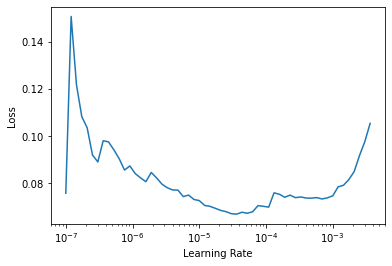

In [7]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(10, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.074766,0.019615,0.998305,0.997245,00:47
1,0.076367,0.020282,0.999158,0.998623,00:47
2,0.076825,0.018619,0.998305,0.997245,00:47
3,0.070966,0.017599,0.998305,0.997245,00:47
4,0.070207,0.017282,0.998305,0.997245,00:47
5,0.068142,0.017691,0.999158,0.998623,00:47
6,0.068265,0.015798,0.999158,0.998623,00:47
7,0.067051,0.019311,0.999158,0.998623,00:49
8,0.069128,0.016448,0.999158,0.998623,00:47
9,0.069792,0.015017,0.999158,0.998623,00:47


In [ ]:
learn.save('480-sequential-3')
torch.save(learn.model.state_dict(), '/media/kevin/SAMSUNGBOOT/480-sequential-3.pkl')

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated7', 'smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()

1078 54


In [3]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.539727,1.044391,0.844598,0.756198,47:36
1,0.333722,0.587549,0.902642,0.841598,47:43
2,0.210112,0.704876,0.892092,0.826446,47:45
3,0.097292,0.188449,0.965456,0.943526,47:46
4,0.042106,0.039056,0.994079,0.990358,47:46


In [4]:
learn.save('480-sequential-all-1')

Path('models/480-sequential-all-1.pth')

SuggestedLRs(lr_min=1.3182566908653825e-05, lr_steep=1.9054607491852948e-06)

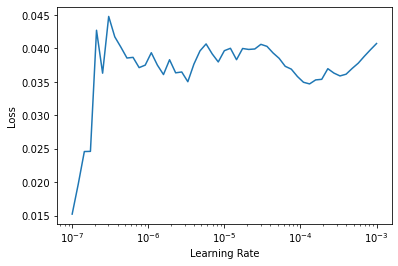

In [5]:
learn.lr_find()

In [6]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.037492,0.024807,0.996628,0.994490,47:48


In [7]:
learn.save('480-sequential-all-2')

Path('models/480-sequential-all-2.pth')

In [8]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.030511,0.032082,0.994932,0.991736,47:49


In [9]:
learn.load('480-sequential-all-2')


In [10]:
torch.save(learn.model.state_dict(), '/media/kevin/SAMSUNGBOOT/480-sequential-all-2.pkl')

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated7', 'smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-all-2')

1078 54


In [3]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.024562,0.026140,0.994932,0.991736,49:31


In [4]:
learn.save('480-sequential-all-3')

Path('models/480-sequential-all-3.pth')

In [5]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.024713,0.023812,0.994943,0.991736,50:19


In [6]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.021538,0.025125,0.996609,0.994490,49:36


In [7]:
learn.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.020700,0.028321,0.994932,0.991736,47:48
1,0.018805,0.020330,0.996609,0.994490,47:35
2,0.022567,0.018931,0.998294,0.997245,47:43


In [ ]:
learn.save('480-sequential-all-4')
torch.save(learn.model.state_dict(), '/media/kevin/SAMSUNGBOOT/480-sequential-all-4.pkl')

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated7', 'smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(10)
learn.save('480-sequential-all-5')
torch.save(learn.model.state_dict(), '/media/kevin/SAMSUNGBOOT/480-sequential-all-5.pkl')

1078 54


epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.420117,0.552306,0.901333,0.838843,49:58
1,0.420644,0.534712,0.898705,0.834711,50:23
2,0.342612,0.944688,0.863112,0.797521,50:23
3,0.303580,0.669262,0.897825,0.844353,48:04
4,0.270797,0.561375,0.927428,0.889807,47:56
5,0.209041,0.416672,0.943538,0.907714,47:57
6,0.169089,0.180941,0.972299,0.957300,47:58
7,0.089034,0.046723,0.991549,0.986226,47:58
8,0.044596,0.051226,0.993255,0.988981,47:56
9,0.028115,0.026816,0.997452,0.995868,48:09


In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated7', 'generated6','smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-all-5')
learn.fit_one_cycle(5)

1078 54


epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.750623,1.531006,0.799567,0.676309,00:55
1,0.733858,0.296346,0.954976,0.926997,00:52
2,0.492319,0.189423,0.977307,0.962810,00:53
3,0.283974,0.040060,0.994105,0.990358,00:52
4,0.169662,0.038066,0.992387,0.987603,00:52


1078 54


SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=1.737800812406931e-05)

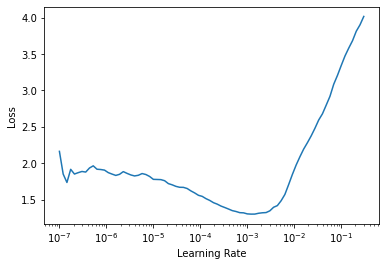

In [3]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated7', 'generated6','smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-all-5')
learn.lr_find()

In [4]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.010656,0.339287,0.926437,0.880165,00:52
1,0.416534,0.034199,0.995793,0.993113,00:52
2,0.223733,0.016554,1.000000,1.000000,00:52
3,0.141231,0.008439,0.999147,0.998623,00:52
4,0.102916,0.007068,1.000000,1.000000,00:52
5,0.080906,0.005809,1.000000,1.000000,00:52
6,0.066413,0.007232,0.999147,0.998623,00:52
7,0.060508,0.006643,1.000000,1.000000,00:52
8,0.056144,0.008719,0.998294,0.997245,00:52
9,0.050657,0.008814,0.998294,0.997245,00:52


In [5]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.733744,0.070915,0.991582,0.986226,00:52
1,0.292267,0.028090,0.999147,0.998623,00:52
2,0.165299,0.024893,0.998305,0.997245,00:52
3,0.120362,0.010572,0.999147,0.998623,00:53
4,0.092369,0.009804,0.999147,0.998623,00:52


In [6]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(6, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.823774,0.174866,0.956944,0.929752,00:52
1,0.312784,0.016100,1.000000,1.000000,00:52
2,0.170325,0.046227,0.995745,0.993113,00:52
3,0.118270,0.012736,0.999147,0.998623,00:52
4,0.095536,0.011870,0.999147,0.998623,00:52
5,0.074959,0.012665,0.998294,0.997245,00:52


In [7]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(1, 1e-4)
learn.save('480-sequential-all-5-1')

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.434189,0.055755,0.993230,0.988981,00:53


Path('models/480-sequential-all-5-1.pth')

In [8]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(2, 1e-4)
learn.save('480-sequential-all-5-2')

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.500832,0.044151,0.998315,0.997245,00:52
1,0.226634,0.032215,0.998294,0.997245,00:52


Path('models/480-sequential-all-5-2.pth')

In [9]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(3, 1e-4)
learn.save('480-sequential-all-5-3')

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.599989,0.048088,0.995815,0.993113,00:52
1,0.255324,0.026855,0.997470,0.995868,00:52
2,0.142568,0.019723,0.997441,0.995868,00:52


Path('models/480-sequential-all-5-3.pth')

In [10]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(4, 1e-4)
learn.save('480-sequential-all-5-4')

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.652885,0.046424,0.994925,0.991736,00:52
1,0.283701,0.019969,0.999147,0.998623,00:52
2,0.153607,0.011603,0.999147,0.998623,00:52
3,0.111644,0.012029,0.999147,0.998623,00:52


Path('models/480-sequential-all-5-4.pth')

In [11]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(7, 1e-4)
learn.save('480-sequential-all-5-5')

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.862367,0.185068,0.950147,0.918733,00:52
1,0.361313,0.037587,0.996639,0.994490,00:52
2,0.203417,0.018255,0.999147,0.998623,00:52
3,0.124238,0.017026,0.998294,0.997245,00:52
4,0.097522,0.012746,0.999147,0.998623,00:52
5,0.074555,0.017812,0.998294,0.997245,00:52
6,0.069785,0.016559,0.998294,0.997245,00:52


Path('models/480-sequential-all-5-5.pth')

In [12]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(8, 1e-4)
learn.save('480-sequential-all-5-6')

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.920244,0.269585,0.937506,0.898072,00:52
1,0.364113,0.034347,0.997452,0.995868,00:52
2,0.195912,0.022513,0.997441,0.995868,00:52
3,0.142780,0.023799,0.995734,0.994490,00:52
4,0.101457,0.017125,0.998294,0.997245,00:52
5,0.076151,0.009340,0.999147,0.998623,00:52
6,0.065184,0.008575,0.999147,0.998623,00:52
7,0.062429,0.009314,0.999147,0.998623,00:52


Path('models/480-sequential-all-5-6.pth')

In [13]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(10, 1e-4, cbs=SaveModelCallback(fname='480-sequential-all-5-best'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.014810,0.368605,0.929018,0.884298,00:52
1,0.414735,0.028191,0.998294,0.997245,00:52
2,0.221591,0.023174,0.998293,0.997245,00:52
3,0.135282,0.019875,1.000000,1.000000,00:52
4,0.113644,0.024761,0.999147,0.998623,00:52
5,0.089593,0.011175,1.000000,1.000000,00:52
6,0.074854,0.008505,0.999147,0.998623,00:52
7,0.058480,0.007402,1.000000,1.000000,00:52
8,0.053292,0.006306,1.000000,1.000000,00:53
9,0.054143,0.006513,1.000000,1.000000,00:53


Better model found at epoch 0 with valid_loss value: 0.36860477924346924.
Better model found at epoch 1 with valid_loss value: 0.02819146029651165.
Better model found at epoch 2 with valid_loss value: 0.023174459114670753.
Better model found at epoch 3 with valid_loss value: 0.019875092431902885.
Better model found at epoch 5 with valid_loss value: 0.011174929328262806.
Better model found at epoch 6 with valid_loss value: 0.008505022153258324.
Better model found at epoch 7 with valid_loss value: 0.007402416784316301.
Better model found at epoch 8 with valid_loss value: 0.0063058556988835335.


In [14]:
learn.load('480-sequential-all-5')
learn.fit_one_cycle(10, 1e-4, cbs=SaveModelCallback(fname='480-sequential-all-5-best-2'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.002423,0.343740,0.934115,0.892562,00:52
1,0.435228,0.046325,0.994925,0.991736,00:53
2,0.227769,0.022987,0.998294,0.997245,00:53
3,0.149603,0.019016,0.999147,0.998623,00:52
4,0.108615,0.015390,0.999147,0.998623,00:53
5,0.088845,0.007764,1.000000,1.000000,00:53
6,0.066749,0.005368,1.000000,1.000000,00:52
7,0.049443,0.005016,1.000000,1.000000,00:52
8,0.048071,0.004375,1.000000,1.000000,00:52
9,0.048551,0.004492,1.000000,1.000000,00:52


Better model found at epoch 0 with valid_loss value: 0.343739777803421.
Better model found at epoch 1 with valid_loss value: 0.046325355768203735.
Better model found at epoch 2 with valid_loss value: 0.02298671565949917.
Better model found at epoch 3 with valid_loss value: 0.01901605725288391.
Better model found at epoch 4 with valid_loss value: 0.015389572829008102.
Better model found at epoch 5 with valid_loss value: 0.007764248177409172.
Better model found at epoch 6 with valid_loss value: 0.005368497222661972.
Better model found at epoch 7 with valid_loss value: 0.005015779752284288.
Better model found at epoch 8 with valid_loss value: 0.00437544658780098.


In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated7', 'generated6','smartphone'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-all-5-best-2')

1078 54


/home/kevin/miniconda3/lib/python3.8/site-packages/fastai/learner.py:55: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [3]:
learn.get_preds()

torch.Size([64, 1024]) torch.Size([192, 1050]) torch.Size([64, 3, 26])
torch.Size([64, 1024]) torch.Size([192, 1050]) torch.Size([64, 3, 26])
torch.Size([64, 1024]) torch.Size([192, 1050]) torch.Size([64, 3, 26])
torch.Size([50, 1024]) torch.Size([150, 1050]) torch.Size([50, 3, 26])


(tensor([[  5.2344,  -2.2109,  -2.4395,  ...,  -3.2715,  -3.3164,   7.4062],
         [  0.7046,  -2.8867,  -4.7266,  ...,  -4.8789,  -6.8008, -14.4375],
         [ -1.4648,  -1.7041,  -3.4531,  ...,  -2.6035,  -0.4897,   6.3438],
         ...,
         [ -4.1562,  -2.0586,   2.5449,  ...,  -3.3203,  -3.1855,   6.8164],
         [ -2.7441,  -5.3438,  -2.8711,  ...,  -4.9258,  -8.1250, -15.1094],
         [  3.4062,  -3.6289,  -2.6113,  ...,  -2.6055,  -2.8184,   6.7539]]),
 TensorMultiCategory([[0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]))

In [3]:
torch.save(learn.model.encoder.state_dict(), '/media/kevin/SAMSUNGBOOT/480-encoder-1.pkl')

In [4]:
model = learn.model.encoder
model.eval().cpu()
example = torch.rand(1, 3, 480, 640)
traced_script_module = torch.jit.trace(model, example)
traced_script_module.save('/media/kevin/SAMSUNGBOOT/480-encoder-1.pt')

In [6]:
model = learn.model.head
model.eval().cpu()
examples = torch.rand(1, 1050)
traced_script_module = torch.jit.trace(model, examples)
traced_script_module.save('/media/kevin/SAMSUNGBOOT/480-head-1.pt')

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=180.0, exclude=[])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-all-5-best-2')

/home/kevin/miniconda3/lib/python3.8/site-packages/fastai/learner.py:55: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [3]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.057788,1.034669,0.838956,0.758953,1:28:49
1,0.822047,0.509348,0.904385,0.847107,1:29:21
2,0.470060,0.289210,0.947449,0.915978,1:29:34
3,0.238134,0.102700,0.987319,0.979339,1:29:40


In [4]:
learn.save('480-sequential-180-1')

Path('models/480-sequential-180-1.pth')

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=180.0, exclude=[])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-180-1')

In [4]:
model = learn.model.encoder
model.eval().cpu()
example = torch.rand(1, 3, 480, 640)
traced_script_module = torch.jit.trace(model, example)
traced_script_module.save('/media/kevin/SAMSUNGBOOT/480-encoder-2.pt')

In [6]:
model = learn.model.head
model.eval().cpu()
examples = torch.rand(1, 1050)
traced_script_module = torch.jit.trace(model, examples)
traced_script_module.save('/media/kevin/SAMSUNGBOOT/480-head-2.pt')

In [3]:
torch.save(learn.model.encoder.state_dict(), '/media/kevin/SAMSUNGBOOT/480-encoder-2.pth')
torch.save(learn.model.head.state_dict(), '/media/kevin/SAMSUNGBOOT/480-head-2.pth')

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=180.0, exclude=['generated7', 'generated6'])
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-180-1')
learn.fit_one_cycle(10, 1e-4, cbs=SaveModelCallback(fname='480-sequential-180-2-best'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.829304,0.255610,0.947540,0.914601,02:17
1,0.432266,0.049239,0.994892,0.991736,02:14
2,0.348827,0.046549,0.994097,0.990358,02:14
3,0.282561,0.024766,0.996628,0.994490,02:14
4,0.261834,0.024639,0.996587,0.994490,02:14
5,0.226236,0.026090,0.997452,0.995868,02:14
6,0.185368,0.019455,0.998294,0.997245,02:14
7,0.159970,0.016662,0.999147,0.998623,02:14
8,0.152045,0.016375,0.999147,0.998623,02:14
9,0.158597,0.015864,0.999147,0.998623,02:14


Better model found at epoch 0 with valid_loss value: 0.2556103467941284.
Better model found at epoch 1 with valid_loss value: 0.04923870041966438.
Better model found at epoch 2 with valid_loss value: 0.04654932767152786.
Better model found at epoch 3 with valid_loss value: 0.024766264483332634.
Better model found at epoch 4 with valid_loss value: 0.024638894945383072.
Better model found at epoch 6 with valid_loss value: 0.01945466175675392.
Better model found at epoch 7 with valid_loss value: 0.01666218414902687.
Better model found at epoch 8 with valid_loss value: 0.01637514866888523.
Better model found at epoch 9 with valid_loss value: 0.015864236280322075.


In [3]:
learn.fit_one_cycle(10, 1e-4, cbs=SaveModelCallback(fname='480-sequential-180-2-best-2'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.156046,0.017214,0.999147,0.998623,02:14
1,0.186420,0.024752,0.997418,0.995868,02:14
2,0.208139,0.062106,0.990706,0.984848,02:14
3,0.192856,0.010331,1.000000,1.000000,02:14
4,0.178489,0.024830,0.995745,0.993113,02:14
5,0.147460,0.011132,0.999147,0.998623,02:14
6,0.138090,0.016839,0.998294,0.997245,02:14
7,0.129814,0.010397,0.998294,0.997245,02:14
8,0.107899,0.008871,0.998294,0.997245,02:14
9,0.108633,0.009080,0.998294,0.997245,02:14


Better model found at epoch 0 with valid_loss value: 0.017213936895132065.
Better model found at epoch 3 with valid_loss value: 0.010330847464501858.
Better model found at epoch 8 with valid_loss value: 0.008870518766343594.
